In [100]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt # plotting
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [82]:
# Load the dataset (Assuming the dataset is in a CSV file named 'diabetes.csv')
data = pd.read_csv('diabetes.csv')

In [83]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [85]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Assuming 'data' is the DataFrame containing the diabetes data

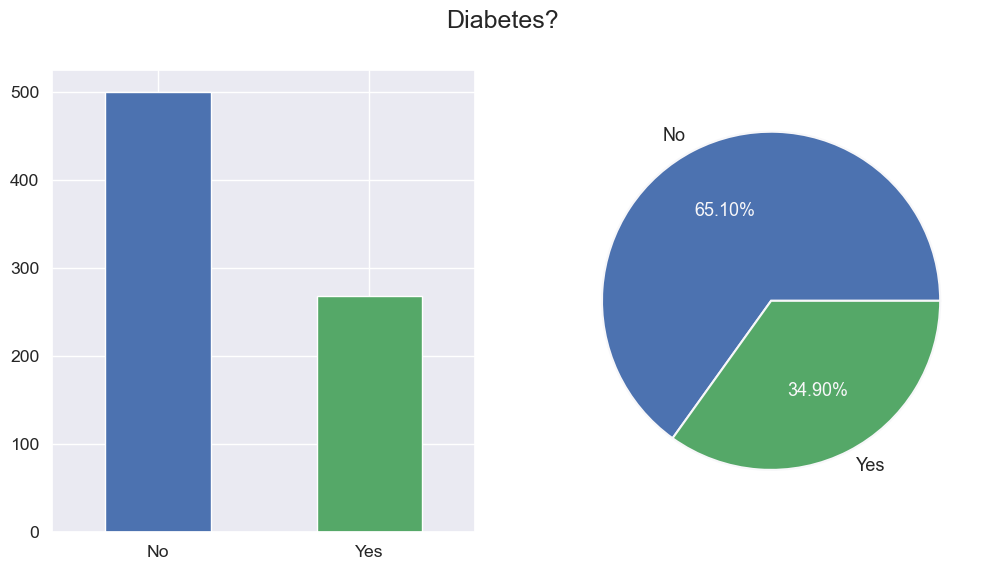

In [108]:
# Create a 1x2 subplot with a figure size of (12, 6)
f, ax = plt.subplots(1, 2, figsize=(12, 6))

# Set the main title for the entire figure
f.suptitle("Diabetes?", fontsize=18.)

# Plot a bar chart for the distribution of "Outcome" values
_ = data.Outcome.value_counts().plot.bar(ax=ax[0], rot=0, color=(sns.color_palette()[0], sns.color_palette()[2]))

# Customize the x-axis tick labels
_ = ax[0].set_xticklabels(["No", "Yes"])

# Plot a pie chart for the distribution of "Outcome" values
_ = data.Outcome.value_counts().plot.pie(labels=("No", "Yes"), autopct="%.2f%%", label="", fontsize=13., ax=ax[1],\
                                        colors=(sns.color_palette()[0], sns.color_palette()[2]), wedgeprops={"linewidth": 1.5, "edgecolor": "#F7F7F9"})

# Customize text color for the pie chart labels
ax[1].texts[1].set_color("#F7F7F9")
ax[1].texts[3].set_color("#F7F7F9")

# Show the plot
plt.show()

C:\Users\Saptarshi Mukherjee\AppData\Local\Temp\ipykernel_28976\3215542580.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Pregnancies, bins=20, ax=ax[0, 0])
C:\Users\Saptarshi Mukherjee\AppData\Local\Temp\ipykernel_28976\3215542580.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(da

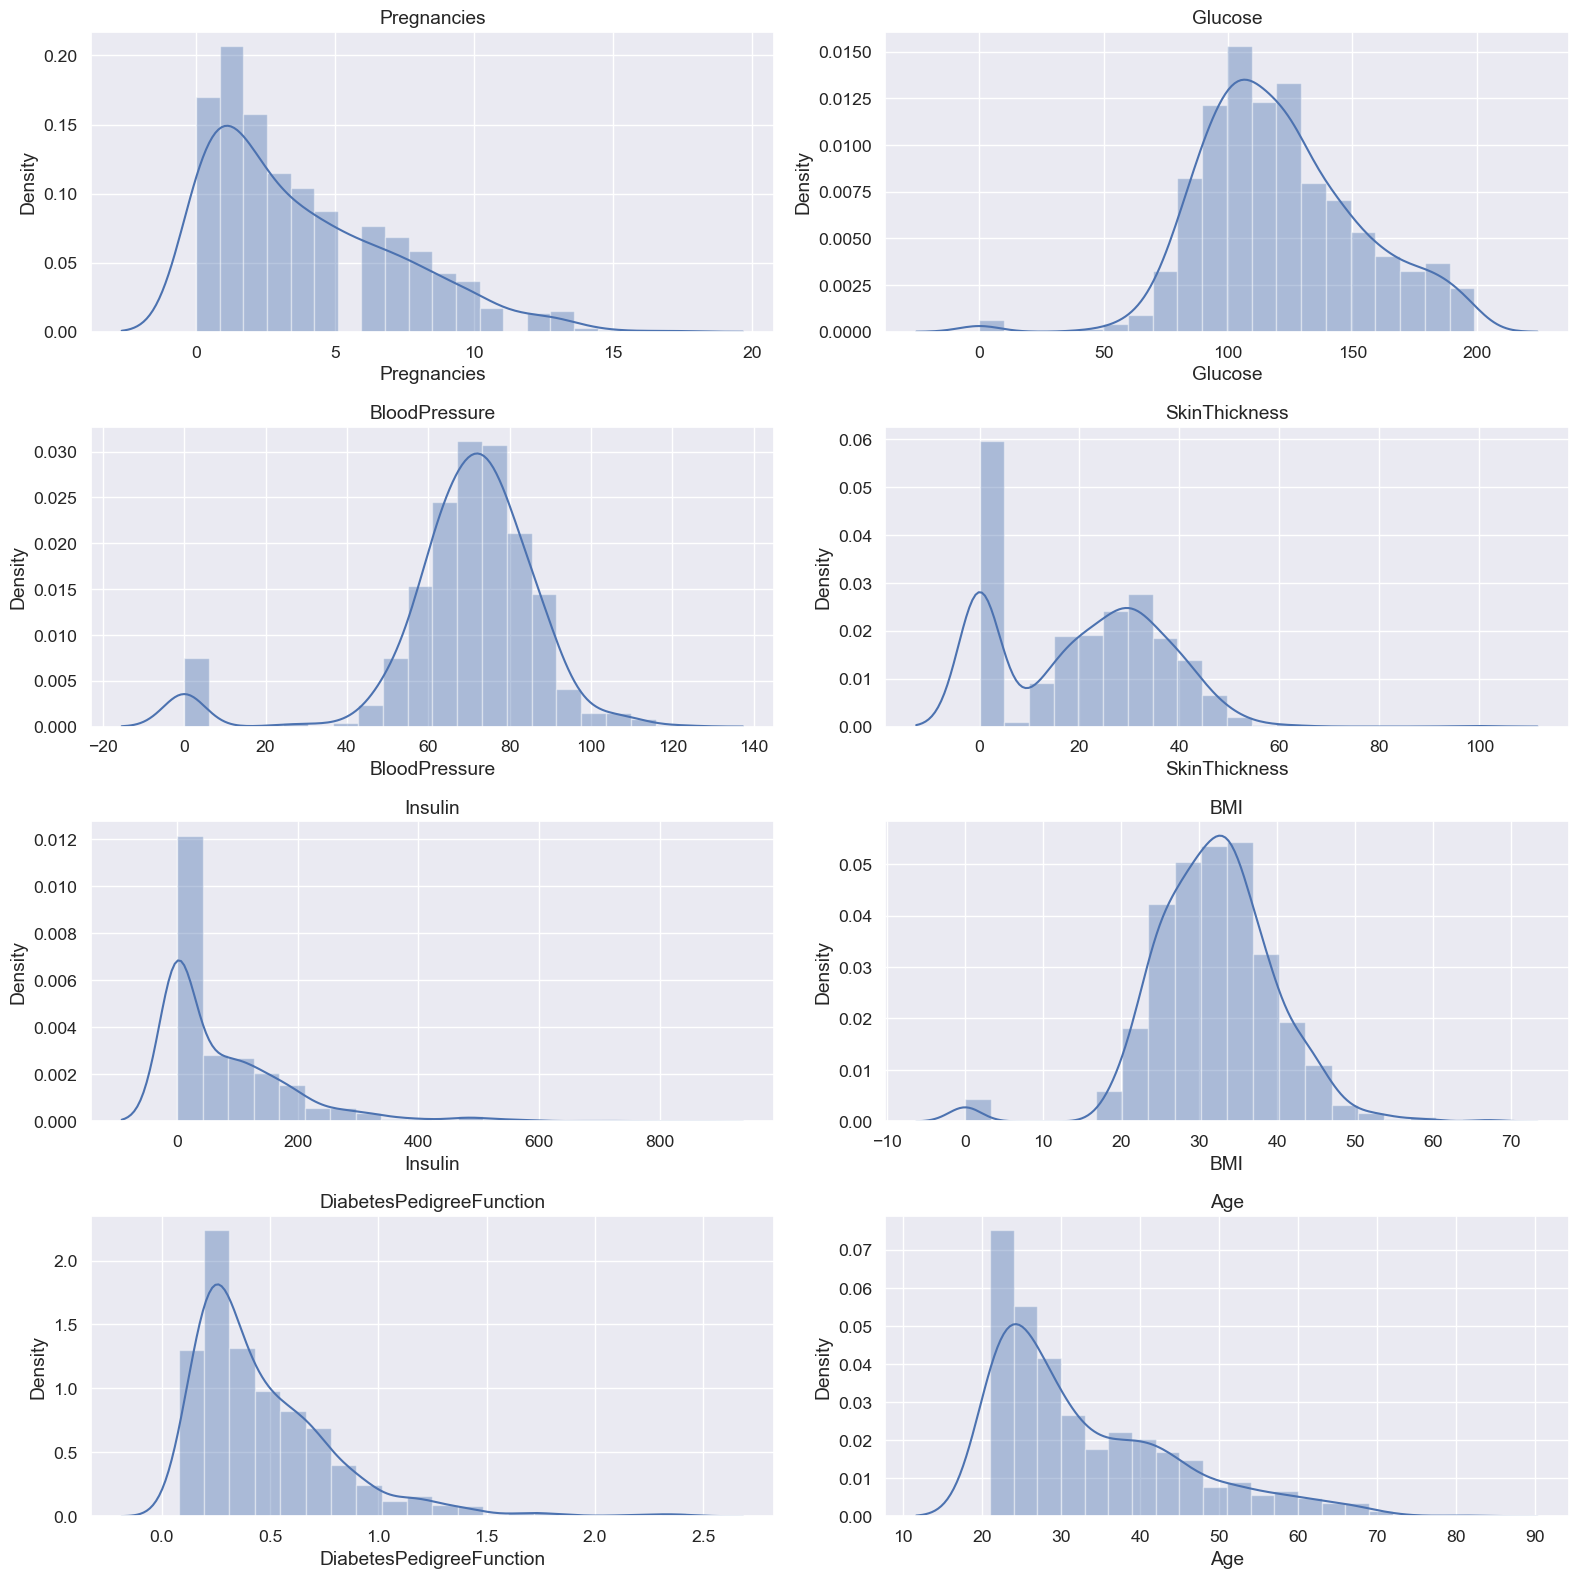

In [109]:
# Create a 4x2 grid of subplots with a figure size of (16, 16)
fig, ax = plt.subplots(4, 2, figsize=(16, 16))

# Plot the distribution of "Pregnancies" in the first subplot (top-left)
sns.distplot(data.Pregnancies, bins=20, ax=ax[0, 0])

# Plot the distribution of "Glucose" in the second subplot (top-right)
sns.distplot(data.Glucose, bins=20, ax=ax[0, 1])

# Plot the distribution of "BloodPressure" in the third subplot (middle-left)
sns.distplot(data.BloodPressure, bins=20, ax=ax[1, 0])

# Plot the distribution of "SkinThickness" in the fourth subplot (middle-right)
sns.distplot(data.SkinThickness, bins=20, ax=ax[1, 1])

# Plot the distribution of "Insulin" in the fifth subplot (bottom-left)
sns.distplot(data.Insulin, bins=20, ax=ax[2, 0])

# Plot the distribution of "BMI" in the sixth subplot (bottom-right)
sns.distplot(data.BMI, bins=20, ax=ax[2, 1])

# Plot the distribution of "DiabetesPedigreeFunction" in the seventh subplot (bottom-left)
sns.distplot(data.DiabetesPedigreeFunction, bins=20, ax=ax[3, 0])

# Plot the distribution of "Age" in the eighth subplot (bottom-right)
sns.distplot(data.Age, bins=20, ax=ax[3, 1])

# Add titles for each subplot (optional)
ax[0, 0].set_title("Pregnancies")
ax[0, 1].set_title("Glucose")
ax[1, 0].set_title("BloodPressure")
ax[1, 1].set_title("SkinThickness")
ax[2, 0].set_title("Insulin")
ax[2, 1].set_title("BMI")
ax[3, 0].set_title("DiabetesPedigreeFunction")
ax[3, 1].set_title("Age")

# Adjust spacing between subplots (optional)
plt.tight_layout()

# Show the plot
plt.show()

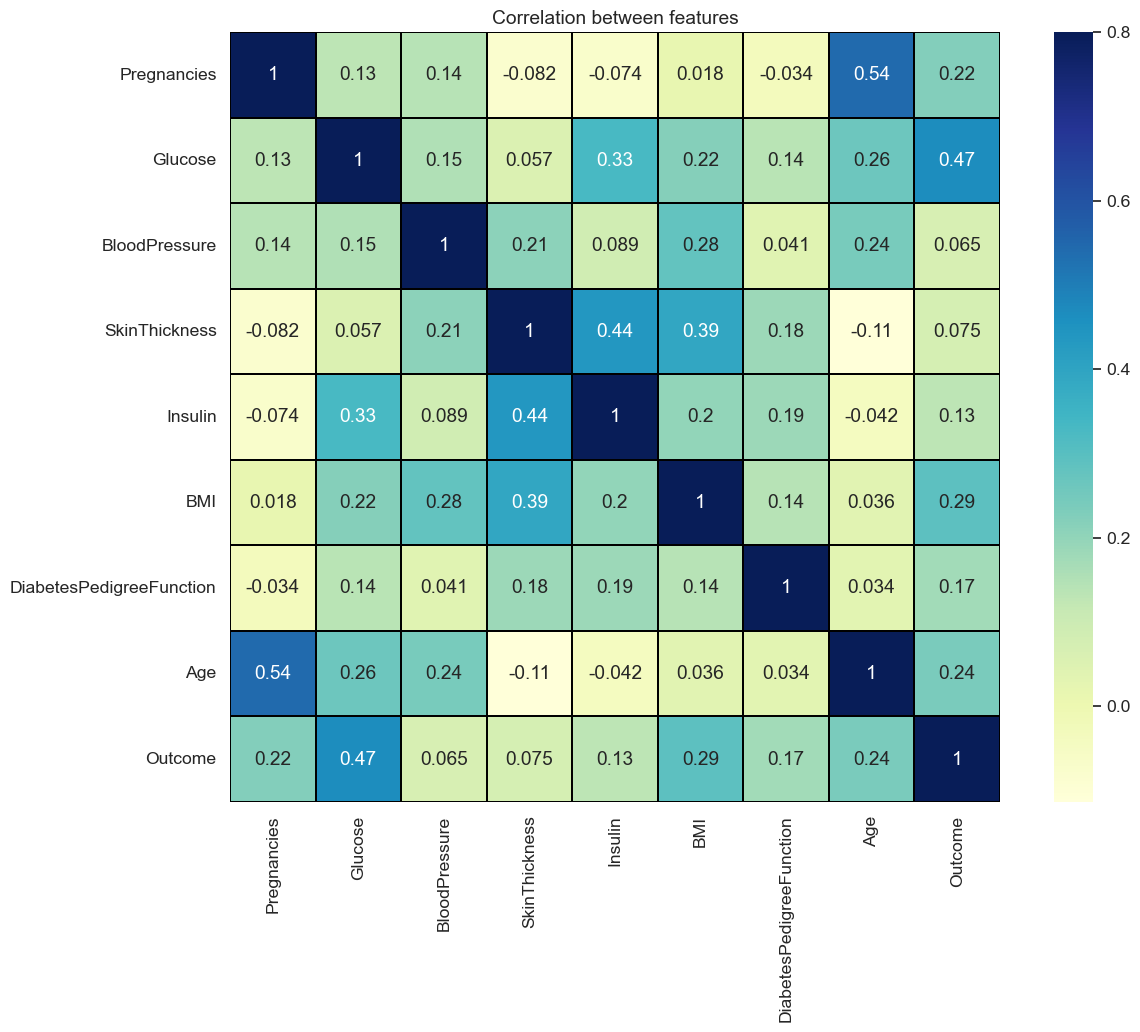

In [88]:
corr=data.corr()

sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features');

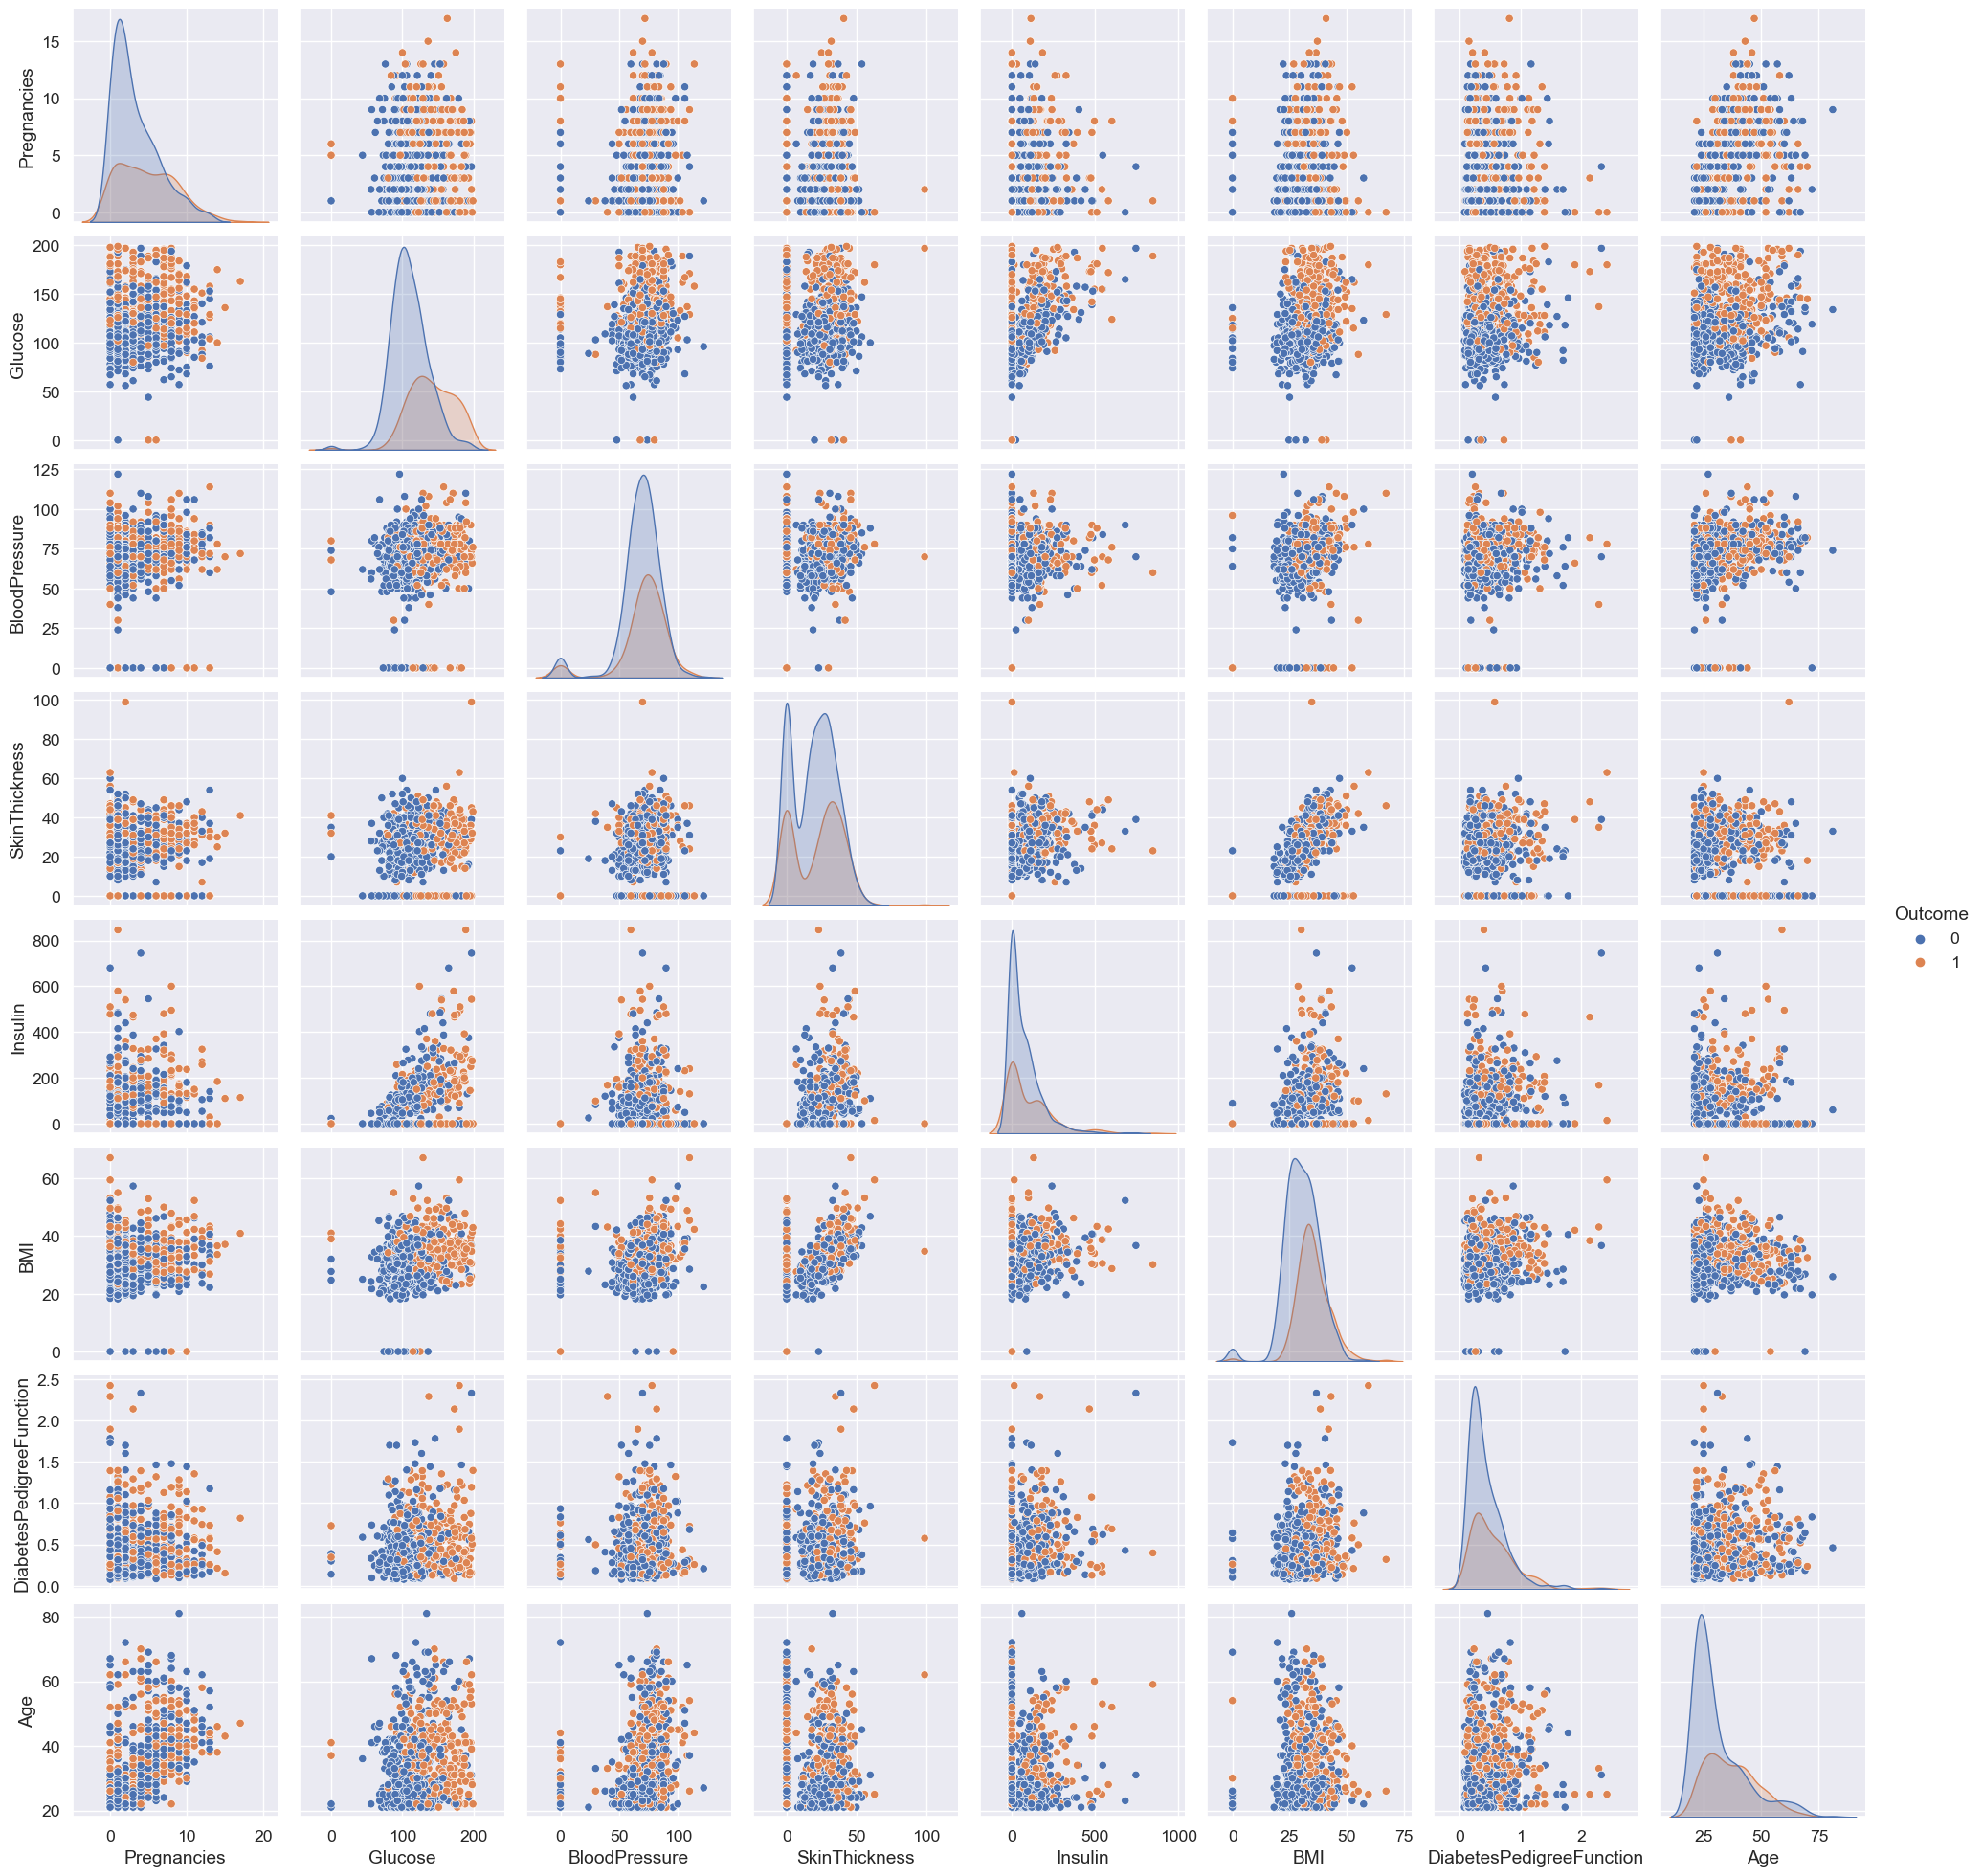

In [89]:
sns.pairplot(data=data, hue='Outcome')
plt.show()

In [90]:
x = data.iloc[:,0:8].values
y = data.iloc[:, -1].values


# Assuming you have a dataset 'x' with features that need to be standardized

In [91]:
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler
sc = StandardScaler()

# Use the fit_transform method to standardize the features in 'x'
x = sc.fit_transform(x)


In [112]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets with a test size of 20% and random state of 12
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=12)

# Create a Sequential model
model = Sequential()

# Add the input layer with 32 neurons and 'softmax' activation function
model.add(Dense(32, input_dim=8, activation='softmax'))

# Add a hidden layer with 16 neurons and 'relu' activation function
model.add(Dense(16, activation='relu'))

# Add another hidden layer with 8 neurons and 'relu' activation function
model.add(Dense(8, activation='relu'))

# Add the output layer with 1 neuron and 'sigmoid' activation function
model.add(Dense(1, activation='sigmoid'))

# Compile the model with mean squared error (MSE) as the loss function, Adam optimizer, and accuracy as a metric
model.compile(loss='MSE', optimizer='adam', metrics=['accuracy'])

# Display the summary of the model
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 32)                288       
                                                                 
 dense_17 (Dense)            (None, 16)                528       
                                                                 
 dense_18 (Dense)            (None, 8)                 136       
                                                                 
 dense_19 (Dense)            (None, 1)                 9         
                                                                 
Total params: 961 (3.75 KB)
Trainable params: 961 (3.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [93]:
# Assuming you have imported the necessary libraries and `model` is your defined Keras model
# Train the model using the fit method
# x_train: Training data features
# y_train: Training data labels (ground truth)
# epochs: Number of times the entire training dataset is passed forward and backward through the neural network
# validation_data: Data to be used for validation during training (x_test and y_test in this case)

hist = model.fit(x_train,y_train, epochs =100,validation_data=(x_test, y_test))

Epoch 1/100
20/20 [==============================] - 3s 24ms/step - loss: 0.2495 - accuracy: 0.5814 - val_loss: 0.2485 - val_accuracy: 0.6429
Epoch 2/100
20/20 [==============================] - 0s 7ms/step - loss: 0.2469 - accuracy: 0.6547 - val_loss: 0.2446 - val_accuracy: 0.6429
Epoch 3/100
20/20 [==============================] - 0s 8ms/step - loss: 0.2427 - accuracy: 0.6531 - val_loss: 0.2409 - val_accuracy: 0.6429
Epoch 4/100
20/20 [==============================] - 0s 7ms/step - loss: 0.2388 - accuracy: 0.6531 - val_loss: 0.2372 - val_accuracy: 0.6429
Epoch 5/100
20/20 [==============================] - 0s 8ms/step - loss: 0.2348 - accuracy: 0.6531 - val_loss: 0.2328 - val_accuracy: 0.6429
Epoch 6/100
20/20 [==============================] - 0s 7ms/step - loss: 0.2300 - accuracy: 0.6531 - val_loss: 0.2283 - val_accuracy: 0.6429
Epoch 7/100
20/20 [==============================] - 0s 8ms/step - loss: 0.2251 - accuracy: 0.6531 - val_loss: 0.2235 - val_accuracy: 0.6429
Epoch 8/100


In [102]:
# Evaluate the model on the training dataset
scores_train = model.evaluate(x_train, y_train)
print("Training Accuracy: %.2f%%\n" % (scores_train[1] * 100))

# Evaluate the model on the testing dataset
scores_test = model.evaluate(x_test, y_test)
print("Testing Accuracy: %.2f%%\n" % (scores_test[1] * 100))

# Make predictions on the test set
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Convert y_test to one-hot encoding (if not already one-hot encoded)
y_test_one_hot = to_categorical(y_test)

# Get the true labels using argmax on the one-hot encoded y_test
y_true_labels = np.argmax(y_test_one_hot, axis=1)

# Print the classification report
print("Classification Report:")
print(classification_report(y_true_labels, y_pred_labels))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_true_labels, y_pred_labels))


20/20 [==============================] - 0s 3ms/step - loss: 0.1343 - accuracy: 0.8013
Training Accuracy: 80.13%

5/5 [==============================] - 0s 4ms/step - loss: 0.1452 - accuracy: 0.8247
Testing Accuracy: 82.47%

5/5 [==============================] - 0s 3ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.64      1.00      0.78        99
           1       0.00      0.00      0.00        55

    accuracy                           0.64       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.41      0.64      0.50       154

Confusion Matrix:
[[99  0]
 [55  0]]


C:\Users\Saptarshi Mukherjee\OneDrive\Desktop\New folder\New folder\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Saptarshi Mukherjee\OneDrive\Desktop\New folder\New folder\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Saptarshi Mukherjee\OneDrive\Desktop\New folder\New folder\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_

In [103]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

5/5 [==============================] - 0s 3ms/step
[[0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 

In [104]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[90  9]
 [18 37]]


0.8246753246753247

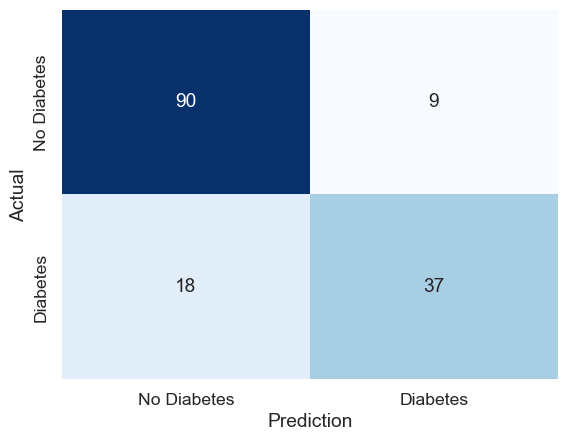

In [105]:
ax = sns.heatmap(cm, annot=True, xticklabels=["No Diabetes",'Diabetes'], yticklabels=['No Diabetes','Diabetes'],
                cbar=False,cmap='Blues')
ax.set_xlabel('Prediction')
ax.set_ylabel('Actual')
plt.show()

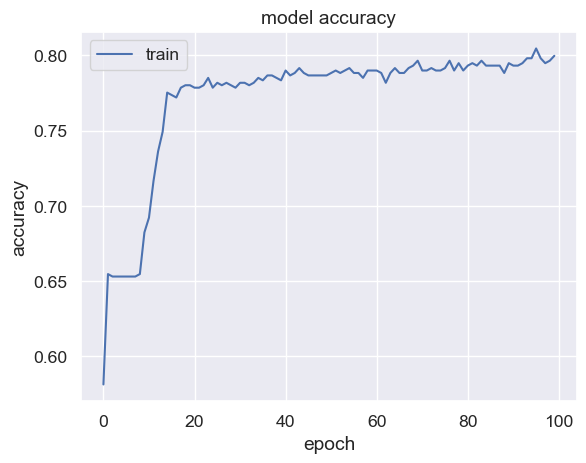

<Figure size 640x480 with 0 Axes>

In [106]:
acc = hist.history['accuracy']
loss = hist.history['loss']
from matplotlib import pyplot as plt
plt.plot(hist.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
plt.savefig('accuracy_curve.png')

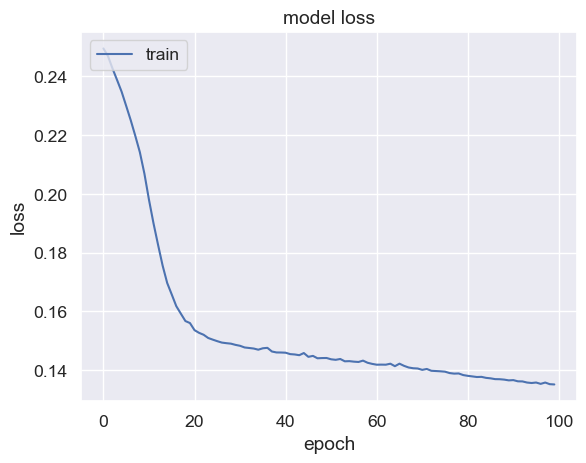

<Figure size 640x480 with 0 Axes>

In [107]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
plt.savefig('loss_curve.png')